In [212]:
import pandas as pd
addata=pd.read_csv(r'C:\Users\genus\OneDrive\Documents\flights\adveiwership.csv')

In [213]:
addata.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [214]:
#Lets check the number of campaigns in the data
addata['fb_campaign_id'].value_counts()

144536    6
144562    6
144599    6
144636    6
144611    6
         ..
115866    1
115870    1
115876    1
115878    1
179982    1
Name: fb_campaign_id, Length: 691, dtype: int64

In [215]:
#Lets understand the performance of each campaign in terms of user response
from matplotlib.pyplot import boxplot

impressionsdata=addata.groupby(['fb_campaign_id'])['Impressions'].sum().sort_values(ascending=False).reset_index()
clickdata=addata.groupby(['fb_campaign_id'])['Clicks'].sum().sort_values(ascending=False).reset_index()
conversiondata=addata.groupby(['fb_campaign_id'])['Total_Conversion'].sum().sort_values(ascending=True).reset_index()

In [216]:
conversiondata

,fb_campaign_id,Total_Conversion
0,108792,0
1,110962,0
2,116623,1
3,144646,1
4,115904,1
...,...,...
686,144531,58
687,144659,63
688,144554,66
689,144533,73


In [217]:
impressionsdata

,fb_campaign_id,Impressions
0,144624,5528364
1,144674,5187106
2,144532,4737422
3,144599,4221211
4,144724,3792019
...,...,...
686,123567,246
687,108686,239
688,123519,219
689,123558,199


In [218]:
impressionsdata['rank']=impressionsdata['Impressions'].rank(method='max')
clickdata['rank']=clickdata['Clicks'].rank(method='max')
conversiondata['rank']=conversiondata['Total_Conversion'].rank(method='first')

In [219]:
conversiondata

,fb_campaign_id,Total_Conversion,rank
0,108792,0,1.0
1,110962,0,2.0
2,116623,1,3.0
3,144646,1,4.0
4,115904,1,5.0
...,...,...,...
686,144531,58,687.0
687,144659,63,688.0
688,144554,66,689.0
689,144533,73,690.0


In [220]:
top5impressions=impressionsdata.head(5)
top5clicks=clickdata.head(5)
top5conversions=conversiondata.tail(5)

In [221]:
top5conversions

,fb_campaign_id,Total_Conversion,rank
686,144531,58,687.0
687,144659,63,688.0
688,144554,66,689.0
689,144533,73,690.0
690,144532,94,691.0


<AxesSubplot:xlabel='fb_campaign_id', ylabel='Impressions'>

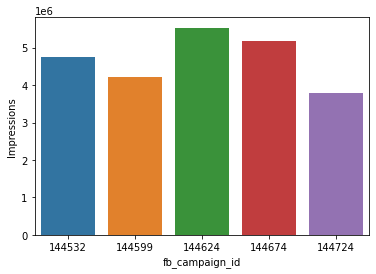

In [222]:
from cProfile import label
from matplotlib.pyplot import legend
import seaborn as sns
sns.barplot(x=top5impressions['fb_campaign_id'],y=top5impressions['Impressions'],data=top5impressions)


<AxesSubplot:xlabel='fb_campaign_id', ylabel='Clicks'>

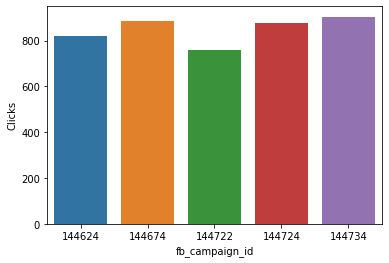

In [223]:
sns.barplot(x=top5clicks['fb_campaign_id'],y=top5clicks['Clicks'],data=top5clicks)

<AxesSubplot:xlabel='fb_campaign_id', ylabel='Total_Conversion'>

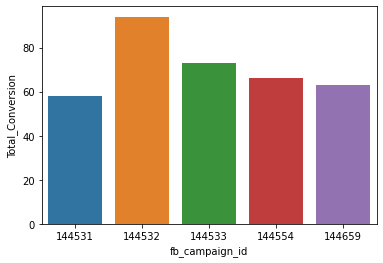

In [224]:
sns.barplot(x=top5conversions['fb_campaign_id'],y=top5conversions['Total_Conversion'],data=top5conversions)

In [225]:
#Lets understand the performance of each campaign in terms of user response
from matplotlib.pyplot import boxplot
impressionsdata=addata.groupby(['age'])['Impressions'].sum().sort_values(ascending=False).reset_index()
clickdata=addata.groupby(['age'])['Clicks'].sum().sort_values(ascending=False).reset_index()
conversiondata=addata.groupby(['age'])['Total_Conversion'].sum().sort_values(ascending=True).reset_index()

In [226]:
impressionsdata

,age,Impressions
0,30-34,67993019
1,45-49,63732858
2,35-39,42104644
3,40-44,39604307


In [227]:
clickdata

,age,Clicks
0,45-49,13852
1,30-34,9483
2,40-44,7736
3,35-39,7094


In [228]:
conversiondata

,age,Total_Conversion
0,40-44,523
1,35-39,626
2,45-49,684
3,30-34,1431


In [229]:
top5impressions=impressionsdata
top5clicks=clickdata
top5conversions=conversiondata

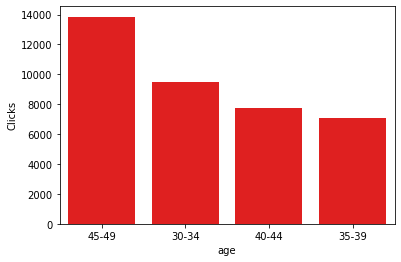

In [230]:
s1 = sns.barplot(x = 'age', y = 'Clicks', data = top5clicks, color = 'red')

#s2 = sns.barplot(x = 'fb_campaign_id', y = 'Clicks', data = top5clicks, hue = 'age')

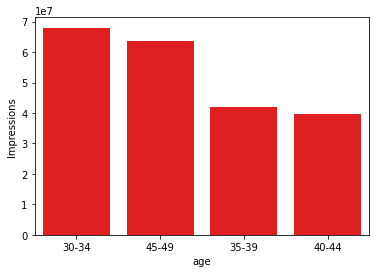

In [231]:
s1 = sns.barplot(x = 'age', y = 'Impressions', data = top5impressions, color = 'red')


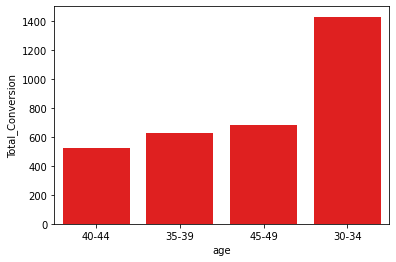

In [232]:
s1 = sns.barplot(x = 'age', y = 'Total_Conversion', data = top5conversions, color = 'red')

In [239]:
spentconv=addata.groupby(['fb_campaign_id'])[['Total_Conversion','Spent']].sum().reset_index()

In [242]:
spentconv=spentconv[spentconv['Spent']>0]
spentconv['Conversiontospendratio']=spentconv['Total_Conversion']/spentconv['Spent']

C:\Users\genus\AppData\Local\Temp/ipykernel_46088/1120139341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spentconv['Conversiontospendratio']=spentconv['Total_Conversion']/spentconv['Spent']


In [243]:
spentconv



,fb_campaign_id,Total_Conversion,Spent,Conversiontospendratio
0,103916,2,1.430000,1.398601
1,103917,2,1.820000,1.098901
3,103928,2,2.540000,0.787402
5,103940,1,4.770000,0.209644
6,103941,1,1.270000,0.787402
...,...,...,...,...
686,179977,13,358.189997,0.036294
687,179978,3,173.880003,0.017253
688,179979,2,40.289999,0.049640
689,179981,8,198.710001,0.040260
